## Building ANN with one hidden layer
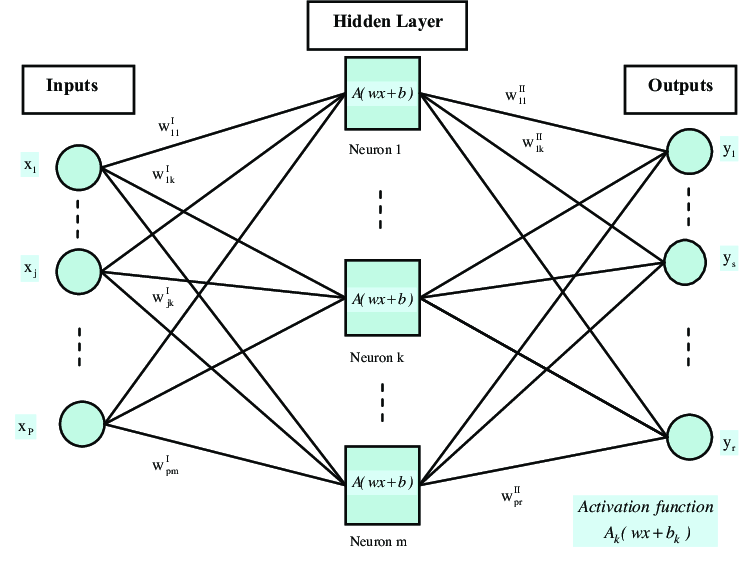
<b>Task is to build Cat vs Non-cat classifier with one hidden layer in ANN <b>

$n_h$= number of units in the hidden layer

In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Data Loading

In [2]:
train_data=h5py.File('train_catvnoncat.h5','r')
test_data=h5py.File('test_catvnoncat.h5','r')
train_set_x=np.array(train_data.get('train_set_x'))
train_set_y=np.array(train_data.get('train_set_y'))
test_set_x=np.array(test_data.get('test_set_x'))
test_set_y=np.array(test_data.get('test_set_y'))

0


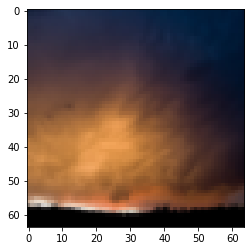

In [3]:
plt.imshow(train_set_x[0])
print(train_set_y[0])

1


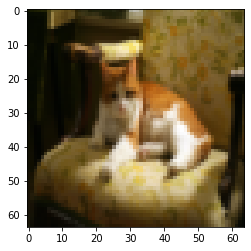

In [4]:
plt.imshow(train_set_x[7])
print(train_set_y[7])

### Training Data set shape

In [5]:
print(train_set_x.shape)
print(train_set_y.shape)

(209, 64, 64, 3)
(209,)


In [6]:
train_x_set=train_set_x.reshape(train_set_x.shape[0],train_set_x.shape[1]*train_set_x.shape[2]*train_set_x.shape[3]).T
train_y_set=train_set_y.reshape(1,train_set_y.shape[0])

In [7]:
print(train_x_set.shape)
print(train_y_set.shape)

(12288, 209)
(1, 209)


In [8]:
test_x_set=test_set_x.reshape(test_set_x.shape[0],test_set_x.shape[1]*test_set_x.shape[2]*test_set_x.shape[3]).T/255
test_y_set=test_set_y.reshape(1,test_set_y.shape[0])

In [9]:
print(test_x_set.shape)
print(test_y_set.shape)

(12288, 50)
(1, 50)


###  Initializing Weights <br>
$W$ is initialized with random values <br>
$b$ is initialized with random values or zero

In [10]:
def initilize_weights(nh,dim):
    """"nh :- Number of units in hidden layer 
        dim :- shape of x_train """
    W1=np.random.rand(nh,dim[0])*0.001
    b1=np.zeros((nh,1))
    W2=np.random.rand(1,nh)*0.001
    b2=0
    parameter={'W1':W1,'W2':W2,'b1':b1,'b2':b2}
    
    return(parameter)

In [11]:
nh=4
parameter=initilize_weights(nh,(3,120))
print('W1 :-',parameter['W1'])
print('W2 :-',parameter['W2'])
print('b1 :-',parameter['b1'])
print('b2 :-',parameter['b2'])

W1 :- [[0.00059429 0.00066135 0.00081129]
 [0.000298   0.0009124  0.00010602]
 [0.0002382  0.00070968 0.0001982 ]
 [0.00014944 0.00036664 0.00098466]]
W2 :- [[0.0004947  0.00098695 0.00047583 0.00042447]]
b1 :- [[0.]
 [0.]
 [0.]
 [0.]]
b2 :- 0


In [12]:
print('W1 :-',parameter['W1'].shape)
print('W2 :-',parameter['W2'].shape)
print('b1 :-',parameter['b1'].shape)

W1 :- (4, 3)
W2 :- (1, 4)
b1 :- (4, 1)


### Forward propagation :-
In this step have two parts <br>
- <b> Linear propogation : </b> <br>
<br>    $ Z^{[1]} = W^{[1]}X+b$ <br>
<br>    $ Z^{[2]} = W^{[2]}X+b$ <br>
- <b> Activation propagation:</b> <br>
 <br>     $ A^{[1]}=tanh(Z^{[1]}) $ <br>
 <br>     $ A^{[2]}=sigmoid(Z^{[2]}) $ <br>
For simplicity i choose tanh activation for hidden layer and sigmoid for output layer

In [13]:
def tanh(z):
    return(np.tanh(z))

In [14]:
def sigmoid(z):
    return(1/(1+np.exp(-z)))

In [15]:
def forward_prop(parameter,X):
    """" parameter :- dictionay of weights """
    z1=np.dot(parameter['W1'],X)+parameter['b1']
    A1=tanh(z1)
    z2=np.dot(parameter['W2'],A1)+parameter['b2']
    A2=sigmoid(z2)
    cache={'A0':X,'A1':A1,'A2':A2,'Z1':z1,'Z2':z2}
    return(cache)

In [16]:
parameter=initilize_weights(4,(120,1))
active_res=forward_prop(parameter,np.random.rand(120,1))

In [17]:
print('A1  :- ',active_res['A1'].shape)
print('A2  :- ',active_res['A2'].shape)

A1  :-  (4, 1)
A2  :-  (1, 1)


### Backward propagation
In backward propagation the calculus chain rule is applied to get gradient of Wieghts and bias.Following equations are got from chain rule  :-
- $ \partial{Z^{[2]}} = A^{[2]} - Y $
- $  \partial{W^{[2]}}= \partial{Z^{[2]}}A^{[1]}$
- $  \partial{b^{[2]}} = \partial{Z^{[2]}}$
- $ \partial{Z^{[1]}} = \partial{W^{[2]^T}}\partial{Z^{[2]}} * \partial{tanh(A^{[1]})} $
- $  \partial{W^{[2]}}= \partial{Z^{[2]}}X$
- $  \partial{b^{[1]}} = \partial{Z^{[1]}}$

In [18]:
def tanh_grad(z):
    a=tanh(z)
    return(1-a**2)

In [19]:
def back_prop(parameter,cache,y,learning_rate):
    
    m=len(y)
    dz2=cache['A2']-y
    dw2=np.dot(dz2,cache['A1'].T)
    db2=np.sum(dz2,axis=1,keepdims=True)
    dz1=np.multiply(np.dot(parameter['W2'].T,dz2),tanh_grad(cache['A1']))
    dw1=np.dot(dz1,cache['A0'].T)
    db1=np.sum(dz1,axis=1,keepdims=True)
    
    parameter['W1']=parameter['W1']-(1/m)*learning_rate*dw1
    parameter['b1']=parameter['b1']-(1/m)*learning_rate*db1
    parameter['W2']=parameter['W2']-(1/m)*learning_rate*dw2
    parameter['b2']=parameter['b2']-(1/m)*learning_rate*db2

    return(parameter)

In [20]:
parameter=initilize_weights(4,train_x_set.shape)
cache=forward_prop(parameter,train_x_set)
parameter=back_prop(parameter,cache,train_set_y,0.001)

In [21]:
print('W1 :-',parameter['W1'].shape)
print('W2 :-',parameter['W2'].shape)
print('b1 :-',parameter['b1'].shape)
print('b2 :-',parameter['b2'].shape)

W1 :- (4, 12288)
W2 :- (1, 4)
b1 :- (4, 1)
b2 :- (1, 1)


### Cost Function 

$ J(W,b) = \frac {-1}{m} \sum_{i=1}^{m}L(\hat y^{(i)},y^{(i)}) $ <br>

$ L(\hat y^{(i)},y^{(i)}) = -[y*log(\hat y) + (1-y)*log(1-\hat y)] $

In [22]:
def compute_cost(y_hat,y):
    """ y_hat :- result of output node
        y  :- true y values """
    m=len(y)
    
    cost=(-1/m)*(y*np.log(y_hat)+(1-y)*np.log(1-y_hat)).sum()
    
    return(cost)

In [23]:
compute_cost(np.array([0.023,0.964,0.65,0.98,0.54,0.76]),np.array([0.34,0.087,0.76,0.65,0.56,0.023]))

1.3975295618155377

### Building model <br>
putting all function together

In [31]:
def ANN_one(units,x_train,y_train,validation_data=None,num_iteration=1000,learning_rate=0.001,verbose=0):
    parameter=initilize_weights(units,x_train.shape)
    costs=[]
    val_costs=[]
    for i in range(1,num_iteration+1):
        #farward propogation
        cache=forward_prop(parameter,x_train)
        #computing cost
        cost=compute_cost(cache['A2'],y_train)
         # computing validation loss
        if validation_data is not None:
            y_val=forward_prop(parameter,validation_data[0])
            val_cost=compute_cost(y_val['A2'],validation_data[1])
            
        # back propogation
        parameter=back_prop(parameter,cache,y_train,learning_rate)
        
        if validation_data is not None:
            if verbose==1 and  i % 100 == 0:
                val_costs.append(val_cost)
                costs.append(cost)
                print("{}--> train_loss= {} ,val_loss = {}".format(i,cost,val_cost))
        if validation_data==None and verbose==1 and  i % 100 == 0:
            val_costs.append(val_cost)
            costs.append(cost)
            print("{}--> train_loss= {}".format(i,cost))
    if validation_data is not None:
        out_values={"parameters":parameter,"loss":costs,"val_loss":val_costs}
    else:
        out_values={"parameters":parameter,"loss":costs}
    return(out_values)

### Data Processing

In [32]:
X_train=train_x_set/255
X_train.max()

1.0

In [33]:
y_train=train_y_set

In [34]:
val_data=(test_x_set,test_y_set)

### Training Model

In [38]:
out_parameters=ANN_one(100,X_train,y_train,val_data,num_iteration=1000,learning_rate=0.001, verbose=1)

100--> train_loss= 466.98928419409594 ,val_loss = 213.34392780183288
200--> train_loss= 499.1943509332057 ,val_loss = 230.69284761703625
300--> train_loss= 75.39151025053323 ,val_loss = 35.15104091947724
400--> train_loss= 67.43668227916771 ,val_loss = 44.711449314335134
500--> train_loss= 55.44565952796115 ,val_loss = 35.77528025394228
600--> train_loss= 212.2440023468544 ,val_loss = 121.55186836885349
700--> train_loss= 66.9761958532385 ,val_loss = 31.293841824628913
800--> train_loss= 59.05700813019814 ,val_loss = 35.273617607239416
900--> train_loss= 93.43950626859606 ,val_loss = 37.759007504551946
1000--> train_loss= 21.527436660104062 ,val_loss = 41.9265180499629


In [50]:
loss_df=pd.DataFrame({'train_loss':out_parameters['loss'],'val_loss':out_parameters["val_loss"]})

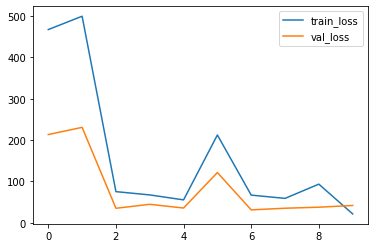

In [51]:
loss_df.plot()

In [52]:
def prediction(parameter,y_true):
    cache=forward_prop(parameter,y_true)
    y=np.where(cache['A2']>0.5,1,0)
    return(y)

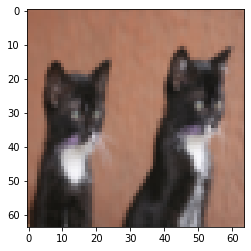

In [53]:
test_point=test_x_set[:,0]
plt.imshow(test_set_x[0])

In [54]:
prediction(out_parameters['parameters'],test_point.reshape(12288,1))

array([[1]])

## Evaluating Model

In [55]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [56]:
test_y_set

array([[1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
        0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0,
        0, 0, 1, 1, 1, 0]], dtype=int64)

In [57]:
pred=prediction(out_parameters['parameters'],val_data[0])
pred

array([[1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
        0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 1, 0]])

In [58]:
print("Accuracy_Score=",accuracy_score(test_y_set.reshape(50),pred.reshape(50)))

Accuracy_Score= 0.76


In [59]:
print(classification_report(test_y_set.reshape(50),pred.reshape(50)))

              precision    recall  f1-score   support

           0       0.63      0.71      0.67        17
           1       0.84      0.79      0.81        33

    accuracy                           0.76        50
   macro avg       0.74      0.75      0.74        50
weighted avg       0.77      0.76      0.76        50



In [60]:
print(confusion_matrix(test_y_set.reshape(50),pred.reshape(50)))

[[12  5]
 [ 7 26]]
